Importing the libraries

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Importing the dataset

In [86]:
df_salaries = pd.read_csv('../data/Position_Salaries.csv')
X = df_salaries.iloc[:, 1:-1].values
y = df_salaries.iloc[:, -1].values

In [87]:
y.shape

(10,)

Feature Scaling

In [88]:
y = y.reshape(len(y), 1)

In [89]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

Training the SVR model

In [90]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X, y)

c:\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [91]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(1, 1))

array([[170370.0204065]])

Visualizing the SVR results

Text(0.5, 1.0, 'SVR')

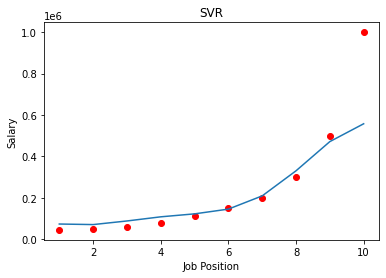

In [92]:
new_y = sc_y.inverse_transform(regressor.predict(X).reshape(-1, 1))
X = sc_X.inverse_transform(X)
plt.scatter(X, sc_y.inverse_transform(y), color = 'red')
plt.plot(X, new_y)
plt.xlabel('Job Position')
plt.ylabel('Salary')
plt.title('SVR')